In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm

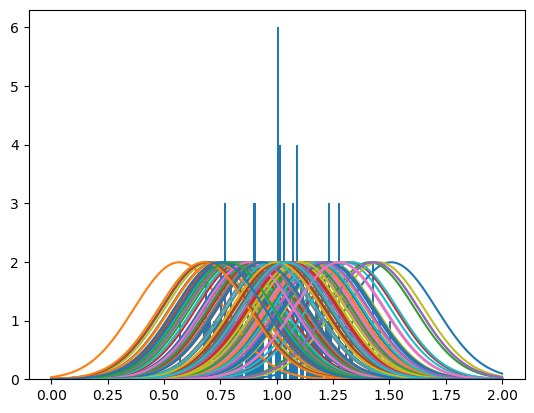

In [34]:
measurements = []
N = 100
for i in range(N):
    measurements.append(random.gauss(1,0.2)) #numbers from a given distribution with mu=1, sigma=0.2
plt.hist(measurements,100)

x = np.linspace(0,2,10000)

for x_i in measurements: 
    plt.plot(x,norm(x_i,0.2).pdf(x))
    
plt.show()

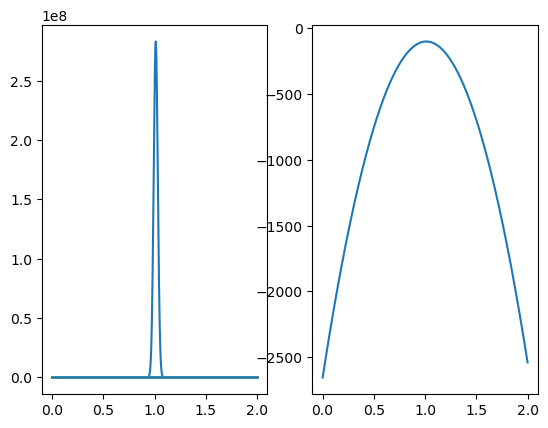

numerical MLE for the true value is:  1.0115011501150115
analytical MLE for the true value is:  1.011438098823754


In [35]:
#MLE approach to get the best estimation on mu

x = np.linspace(0,2,10000)

# we do the product of the 4 gaussians

# computes the product of the likelihood for all measurements. The likelihood function for a Gaussian distribution 
# is calculated for each measurement given the current values of mu_parameter and sigma_parameter

def likelihood_gaus(measurements, mu, sigma):
    L = 1.
    for x in measurements: L = L*norm(mu,sigma).pdf(x) #gaussian_probability(x,mu_parameter, sigma_parameter)
    return L

def log_likelihood_gaus(measurements, mu, sigma): #is it usefull to use this? 
    log_L = 0
    for x in measurements: log_L += -((x-mu)/sigma)**2
    return log_L 

likelihood_gaus = likelihood_gaus(measurements, x, 0.2)
log_likelihood_gaus = log_likelihood_gaus(measurements, x, 0.2)

fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, likelihood_gaus)

for x_i in measurements: 
    ax1.plot(x,norm(x_i,0.2).pdf(x))

ax2.plot(x, log_likelihood_gaus)
plt.show()

#to find the maximum likelihood estimator NUMERICALLY
max_index = np.argsort(log_likelihood_gaus)[::-1][0] 
mu = x[max_index]
print("numerical MLE for the true value is: ",mu) 

#we can compare it with the mean (ANALYTICAL MLE):
print("analytical MLE for the true value is: ",np.mean(measurements)) 

In [36]:
#to find the error we use Fisher matrix
#we need second derivative of log_L computed in the real value estimator computed above

dx = np.diff(x)[0]
der_log_L = np.diff(log_likelihood_gaus)/dx   # derivative of function log_L
der2_log_L = np.diff(der_log_L)/dx            # second derivative of function log L
F_11 = -der2_log_L[max_index]                 # element of Fisher matrix
sigma_mu = np.sqrt(1/F_11)
print("numerical MLE for the UNCERTANTY on mu is: ",sigma_mu) 
#we can compare it with the mean (ANALYTICAL MLE):
print("analytical MLE for the uncertanty on mu is: ",0.2/np.sqrt(N)) 

numerical MLE for the UNCERTANTY on mu is:  0.014142135622509624
analytical MLE for the uncertanty on mu is:  0.02


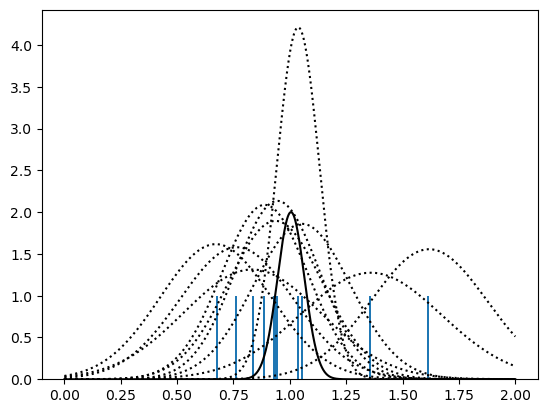

numerical MLE for the true value is:  1.0049004900490048
analytical MLE for the true value is:  1.0106485600063912


In [23]:
N = 10 
#numbers of measurements with the telescope: each measurment consists of one data from underlying
# gaussian distribution with some sigma. 

# HETEROSCEDASTIC GAUSSIAN

errors = []
for i in range(N):
    errors.append(random.gauss(0.2,0.05)) #errors from a given distribution with mu=0.2, sigma=0.05

measurements = []
for i in range(N):
    measurements.append(random.gauss(1,errors[i])) #numbers from a given distribution with mu=1, sigma=0.2
    
plt.hist(measurements,100) #density=True

for i in range(N): plt.plot(x,norm(measurements[i],errors[i]).pdf(x),c='black',linestyle=':',label="single measurements")


Ls = np.array([norm.pdf(x,loc=s,scale=ss) for s,ss in zip(measurements,errors)])

L = np.prod(Ls,axis=0)

plt.plot(x,L,c='black',linestyle='-',label="single measurements")

#plt.legend()

plt.show()

#to find the maximum likelihood estimator NUMERICALLY
max_index = np.argsort(L)[::-1][0] 
mu = x[max_index]
print("numerical MLE for the true value is: ",mu) 

#we can compare it with the mean (ANALYTICAL MLE):
print("analytical MLE for the true value is: ",np.mean(measurements)) 

In [24]:
#to find the error we use Fisher matrix
#we need second derivative of log_L computed in the real value estimator computed above

dx = np.diff(x)[0]
der_log_L = np.diff(log_likelihood_gaus)/dx #derivative of function log_L
der2_log_L = np.diff(der_log_L)/dx #second derivative of function log L

F_11 = -der2_log_L[max_index] #element of Fisher matrix
sigma_mu = np.sqrt(1/F_11)
print("numerical MLE for the UNCERTANTY on mu is: ",sigma_mu) 
#we can compare it with the mean (ANALYTICAL MLE):
sum=0
for i in range(N): sum += errors[i]**-2
print("analytical MLE for the uncertanty on mu is: ",sum**-0.5) 

#sigma_mu = np.diff(np.log(L), n=2)
#sigma_mu /= (xgrid[1]-xgrid[0])**2
#sigma_mu *= -1
#sigma_mu = 1/np.sqrt(sigma_mu)[index_max] #Evaluate at the ML
#print("Fisher matrix error on estimated mean is %.3f" % sigma_mu)



numerical MLE for the UNCERTANTY on mu is:  0.06324555320633081
analytical MLE for the uncertanty on mu is:  0.0597343658641529
